# Kaggle Competition Statistics

In [1]:
import datetime
import requests
import zipfile

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
datetime.datetime.now().ctime()

'Tue Aug 15 21:54:44 2023'

In [3]:
doc_name = 'google-research-identify-contrails-reduce-global-warming-publicleaderboard'

zip_path = f'{doc_name}.zip'
csv_path = f'{doc_name}.csv'

In [4]:
# Download leaderboard
PRIVATE = True

if PRIVATE:
    url = 'https://www.kaggle.com/competitions/51753/leaderboard/download/private'
else:
    url = 'https://www.kaggle.com/competitions/51753/leaderboard/download/public'

req = requests.get(url, allow_redirects=True)
open(zip_path, 'wb').write(req.content)

32801

In [5]:
#with zipfile.ZipFile(zip_path, 'r') as zip_file:
#    #zip_ref.extractall(directory_to_extract_to)
#    print(zip_file.namelist())

In [6]:
# Read leaderboard as zipped csv
df = pd.read_csv(zip_path)

In [7]:
df

,Rank,TeamId,TeamName,LastSubmissionDate,Score,SubmissionCount,TeamMemberUserNames
0,1,10581265,🐢 Jun Koda,2023-08-09 13:12:53,0.72432,49,junkoda
1,2,10597072,DIT,2023-08-09 19:27:14,0.72304,47,"drhabib,iafoss,theoviel"
2,3,10582935,Preferred Contrail,2023-08-09 17:17:18,0.72259,161,"charmq,knshnb,yoichi7yamakawa"
3,4,10438139,KDL,2023-08-09 14:51:35,0.71498,229,"ivanpan,mpware,selimsef"
4,5,10372267,Fight for Gold,2023-08-09 17:45:58,0.71489,198,"imakarov,wuliaokaola"
...,...,...,...,...,...,...,...
949,950,10570104,Igor Krasikov,2023-06-18 19:31:20,0.00000,1,igorkrasikov
950,951,10544811,peace,2023-07-18 13:14:33,0.00000,1,"justinlamlamlam,kebenny"
951,952,10715165,Navid Navid,2023-07-24 16:18:11,0.00000,3,nickyazdani
952,953,10450917,BadApple34,2023-08-09 08:32:50,0.00000,3,badapple34


In [8]:
my_row = df[df['TeamMemberUserNames'] == 'tomlqc']
my_score = my_row['Score'].values[0]
my_row

,Rank,TeamId,TeamName,LastSubmissionDate,Score,SubmissionCount,TeamMemberUserNames
604,605,10539885,tomlqc,2023-08-07 05:58:43,0.6336,22,tomlqc


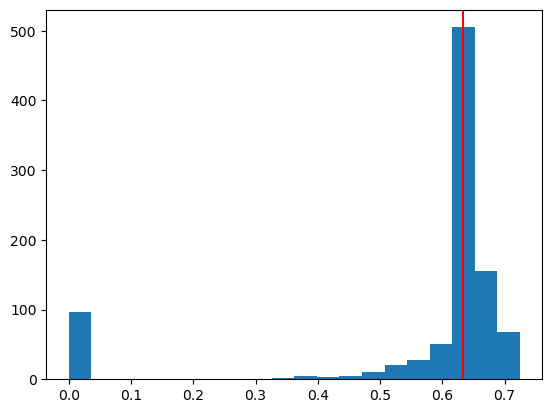

In [9]:
plt.hist(df['Score'], bins=20)
plt.axvline(x=my_score, color='red')
None

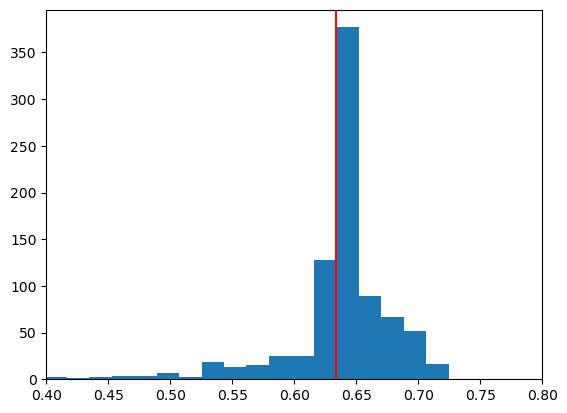

In [10]:
plt.hist(df['Score'], bins=40)
plt.axvline(x=my_score, color='red')
plt.xlim(0.4, 0.8)
None

In [11]:
all_num = df['Score'].count()

In [12]:
for quantile in [1., 10.]:
    top_quantile_score = df['Score'].quantile(q=(1 - quantile / 100))
    top_quantile_num = (df['Score'] > top_quantile_score).sum()
    print(f'top {quantile:2.0f}%: {top_quantile_score:.3f} ({top_quantile_num:2d}/{all_num})')

top  1%: 0.711 (10/954)
top 10%: 0.680 (96/954)
